In [29]:
# Dependencies and Setup
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from pprint import pprint
import requests
import time
from scipy import stats
import seaborn as sn
%matplotlib inline

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Study data files
stanford_path = "Stanford_Data.csv"

stanford_df = pd.read_csv(stanford_path)

In [2]:
# Preview Data Frame
stanford_df.head()
print(len(stanford_df))

3423


In [3]:
# DROPPING INCOMPLETE SURVEYS WHICH ARE ONES THAT DO NOT HAVE TIMESTAMPS FOR EACH SURVEY MILESTONE.

# Replace "incomplete" or a score of "0" for timestamps with blanks to drop null values.
stanford_df["introduction_timestamp"].replace("[not completed]", np.nan, inplace=True)
# stanford_df.replace("[not completed]", np.nan, inplace=True)
stanford_df["social_interactions_timestamp"].replace("0", np.nan, inplace=True)
stanford_df["hobbies_and_health_timestamp"].replace("0", np.nan, inplace=True)
stanford_df["introduction_timestamp"].replace("0", np.nan, inplace=True)
stanford_df["professional_life_timestamp"].replace("0", np.nan, inplace=True)
stanford_df["social_contributions_timestamp"].replace("0", np.nan, inplace=True)

In [4]:
# Drop Null timestamps to retain completed surveys.
completed_surveys = stanford_df.dropna(subset=["introduction_timestamp", "social_interactions_timestamp", 
                                               "hobbies_and_health_timestamp", "professional_life_timestamp", 
                                               "social_contributions_timestamp"])
print(len(completed_surveys))

2778


In [5]:
# DROPPING UNNECESSARY QUESTIONS

clean_df = completed_surveys.drop(columns=["introduction_timestamp", "asian_category", "state_in_india", "province_in_china", 
                          "state_other_countries", "introduction_complete", "social_interactions_timestamp", 
                          "social_interactions_complete", "hobbies_and_health_timestamp", 
                          "hobbies_and_health_complete", "professional_life_timestamp", 
                          "professional_life_complete", "social_contributions_timestamp", 
                          "social_contributions_complete"])
print(len(clean_df))

2778


In [6]:
# Narrowing Down to the US responses.
us_responses = clean_df[clean_df["country"] == 1]
print(len(us_responses))

2050


In [7]:
# # In case there are any empty values, drop surveys that didn't respond to post and pre-covid exercise Q&A.
# #  Should not be an issue because only completed timestamps were retained
# us_responses["covid_exercise"].replace("", np.nan, inplace=True)
# us_responses["physical_activities"].replace("", np.nan, inplace=True)
# print(len(us_responses))

In [8]:
# # In case there are any empty values, drop surveys that didn't respond to post and pre-covid exercise Q&A.
# #  Should not be an issue because only completed timestamps were retained
# us_responses["covid_exercise"].dropna(inplace = True)
# us_responses["physical_activities"].dropna(inplace = True)
# print(len(us_responses))

In [9]:
# Creating Copy to get pre-existing dataframe
preexisting_us = us_responses.copy()
print(len(preexisting_us))

2050


In [10]:
nonexisting_us = us_responses.copy()
print(len(nonexisting_us))

2050


In [11]:
preexisting_us = preexisting_us[preexisting_us["diabetes"] == 1 | 
                                (preexisting_us["cardiovascular_disorders"] == 1) | 
                                (preexisting_us["obesity"] == 1) | 
                                (preexisting_us["respiratory_infections"] == 1) | 
                                (preexisting_us["respiratory_disorders_exam"] == 1) | 
                                (preexisting_us["gastrointestinal_disorders"] == 1) | 
                                (preexisting_us["chronic_kidney_disease"] == 1) | 
                                (preexisting_us["autoimmune_disease"] == 1) | 
                                (preexisting_us["chronic_fatigue_syndrome_a"] == 1)]

In [12]:
print(len(preexisting_us))
preexisting_us.to_csv("preexisting_us.csv", encoding='utf-8', index=False)

155


In [13]:
print(len(preexisting_us))

155


In [14]:
print(len(nonexisting_us))

2050


In [15]:
nonexisting_us = nonexisting_us[(nonexisting_us["diabetes"] == 2) & 
                                (nonexisting_us["cardiovascular_disorders"] == 2) & 
                                (nonexisting_us["obesity"] == 2) & 
                                (nonexisting_us["respiratory_infections"] == 2) & 
                                (nonexisting_us["respiratory_disorders_exam"] == 2) & 
                                (nonexisting_us["gastrointestinal_disorders"] == 2) & 
                                (nonexisting_us["chronic_kidney_disease"] == 2) & 
                                (nonexisting_us["autoimmune_disease"] == 2) & 
                                (nonexisting_us["chronic_fatigue_syndrome_a"] == 2)]

In [16]:
print(len(nonexisting_us))
nonexisting_us.to_csv("nonexisting_us.csv", encoding='utf-8', index=False)

827


In [17]:
# Computation of data for those that identified as having a pre-existing condition.
p_physical_mean = preexisting_us.groupby(["country"],as_index=True).physical_activities.mean()
p_physical_median = preexisting_us.groupby(["country"],as_index=True).physical_activities.median()
# p_physical_mode = preexisting_us.groupby(["country"],as_index=True).physical_activities.mode()
p_physical_sem = preexisting_us.groupby(["country"],as_index=True).physical_activities.sem()
p_physical_std = preexisting_us.groupby(["country"],as_index=True).physical_activities.std()
p_covid_mean = preexisting_us.groupby(["country"],as_index=True).covid_exercise.mean()
p_covid_median = preexisting_us.groupby(["country"],as_index=True).covid_exercise.median()
# p_meancovid_mode = preexisting_us.groupby(["country"],as_index=True).covid_exercise.mode()
p_covid_sem = preexisting_us.groupby(["country"],as_index=True).covid_exercise.sem()
p_covid_std = preexisting_us.groupby(["country"],as_index=True).covid_exercise.std()
print(p_physical_mean)

country
1.0    2.612903
Name: physical_activities, dtype: float64


In [18]:
# Computation of data for those that identified as NOT having a pre-existing condition.
n_physical_mean = nonexisting_us.groupby(["country"],as_index=True).physical_activities.mean()
n_physical_median = nonexisting_us.groupby(["country"],as_index=True).physical_activities.median()
# physical_mode = nonexisting_us.groupby(["country"],as_index=True).physical_activities.mode()
n_physical_sem = nonexisting_us.groupby(["country"],as_index=True).physical_activities.sem()
n_physical_std = nonexisting_us.groupby(["country"],as_index=True).physical_activities.std()
n_covid_mean = nonexisting_us.groupby(["country"],as_index=True).covid_exercise.mean()
n_covid_median = nonexisting_us.groupby(["country"],as_index=True).covid_exercise.median()
# covid_mode = nonexisting_us.groupby(["country"],as_index=True).covid_exercise.mode()
n_covid_sem = nonexisting_us.groupby(["country"],as_index=True).covid_exercise.sem()
n_covid_std = nonexisting_us.groupby(["country"],as_index=True).covid_exercise.std()
print(n_physical_mean)

country
1.0    2.071342
Name: physical_activities, dtype: float64


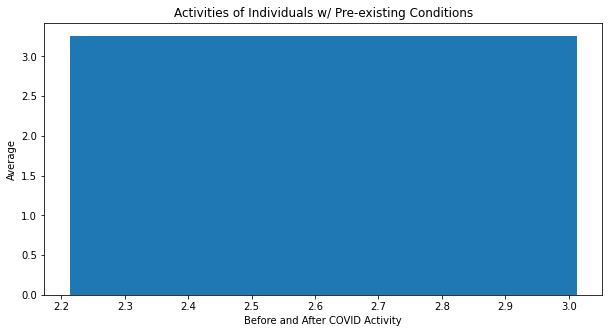

In [46]:
# Dependent Values for Scatter Plot
plt.figure(figsize=(10,5))
plt.bar(p_physical_mean, p_covid_mean)

# Size, Labels, and Grid
plt.title("Activities of Individuals w/ Pre-existing Conditions")
plt.ylabel("Average")
plt.xlabel("Before and After COVID Activity")

# # Save the Plot
# plt.savefig("Script Outputs/Lat_v_Temp.png")

# Show plot
plt.show()